In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import functools
import math
import pandas as pd
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [45]:
def f(x):
    return np.exp(-x) * np.cos(40 * x)

def g(x):
    return np.exp(-x)

In [46]:
def exp_taylor(x, m, degree):
    res = sum( (m ** k) * x ** k / math.factorial(k) for k in range(degree))
    return  res

In [47]:
exp_taylor(2, 1, 10)

7.3887125220458545

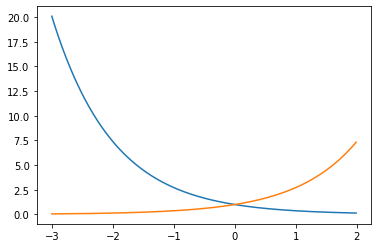

In [48]:
x_data = np.arange(-3, 2, 0.01)

h = np.vectorize(lambda x: exp_taylor(x, 1, 12))
plt.plot(x_data, np.exp(-x_data))
plt.plot(x_data, h(x_data))

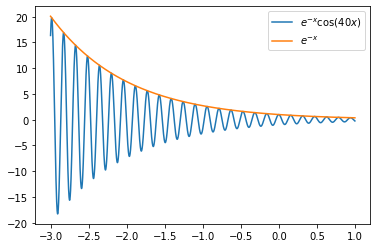

In [49]:
x_data = np.arange(-3, 1, 0.00001)

plt.plot(x_data, f(x_data), label=r"$e^{-x} \cos (40 x)$")
plt.plot(x_data, g(x_data), label=r"$e^{-x}$")
plt.legend()
#plt.savefig("pl.png", dpi=300)

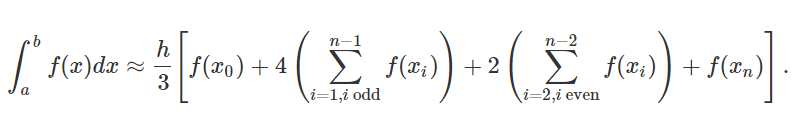

In [51]:
def integrate_simp(f, a, b, n: int =1000):
    """
    :n кількість вузлів
    """
    n = (n + 1) if n % 2 == 0 else n
    
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    f_ = f(x)
    
    I_simp = (h / 3) * (f_[0] + 4 * sum(f_[1:n-1:2]) + 2 * sum(f_[2:n-2:2]) + f_[n-1])
    
    return I_simp

print(type(integrate_simp))

<class 'function'>


In [52]:
n_intervals = 2
h = (1 + 3) / n_intervals
I_1 = integrate_simp(f, -3, 1, 2 + 1)
I_1_2 = integrate_simp(f, -3, 1, 4 + 1)
eps = 10e-5
i = 1
while abs(I_1 - I_1_2) / (2 ** 4 - 1) > eps:
    print(f"n = {n_intervals}, 2n = {2*n_intervals}")
    print(f"h = {h}, h/2 = {h/2}")
    n_intervals *= 2
    I_1 = integrate_simp(f, -3, 1, n_intervals + 1)
    I_1_2 = integrate_simp(f, -3, 1, 2 * n_intervals + 1)
    h = (1 + 3) / n_intervals
    print(f"I_h = {I_1}, I_h/2 = {I_1_2}")
    if abs(I_1 - I_1_2) / (2 ** 4 - 1) > eps:
        print(f"|I_h - I_h/2| / (2^4 -1)  = {abs(I_1 - I_1_2) / (2 ** 4 - 1)} > {eps}")
    else:
        print(f"|I_h - I_h/2| / (2^4 -1)  = {abs(I_1 - I_1_2) / (2 ** 4 - 1)} <  {eps}")
    print()


n = 2, 2n = 4
h = 2.0, h/2 = 1.0
I_h = 4.40647592250837, I_h/2 = 6.913192784859939
|I_h - I_h/2| / (2^4 -1)  = 0.16711445749010465 > 0.0001

n = 4, 2n = 8
h = 1.0, h/2 = 0.5
I_h = 6.913192784859939, I_h/2 = -2.468721303977983
|I_h - I_h/2| / (2^4 -1)  = 0.6254609392558614 > 0.0001

n = 8, 2n = 16
h = 0.5, h/2 = 0.25
I_h = -2.468721303977983, I_h/2 = -1.0264966291209785
|I_h - I_h/2| / (2^4 -1)  = 0.09614831165713364 > 0.0001

n = 16, 2n = 32
h = 0.25, h/2 = 0.125
I_h = -1.0264966291209785, I_h/2 = 0.45849525989100726
|I_h - I_h/2| / (2^4 -1)  = 0.09899945926746571 > 0.0001

n = 32, 2n = 64
h = 0.125, h/2 = 0.0625
I_h = 0.45849525989100726, I_h/2 = 0.31292357714692326
|I_h - I_h/2| / (2^4 -1)  = 0.0097047788496056 > 0.0001

n = 64, 2n = 128
h = 0.0625, h/2 = 0.03125
I_h = 0.31292357714692326, I_h/2 = 0.30881737584743374
|I_h - I_h/2| / (2^4 -1)  = 0.00027374675329930136 > 0.0001

n = 128, 2n = 256
h = 0.03125, h/2 = 0.015625
I_h = 0.30881737584743374, I_h/2 = 0.3085955344586014
|I_h - I

$$ \int_{a}^{b} e^{-m x} \cos (\omega x) d x \approx \int_{a}^{b} \sum_{k=0}^{n} c_{k} \varphi^{k} \cos (\omega x) d x$$
$$ \int_{a}^{b} \sum_{k=0}^{n} c_{k} \varphi^{k} \cos (\omega x) d x = \sum_{k=0}^{n}c_k \int_{a}^{b} x^k \cos (\omega x) dx $$
$$ \varphi_k = x^k$$

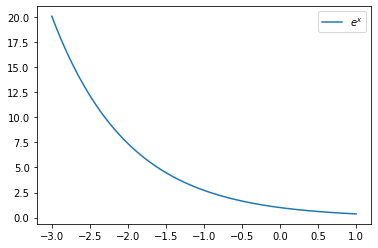

In [53]:
plt.plot(x_data, g(x_data), label=r"$e^x$")
plt.legend()

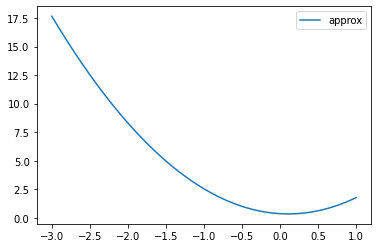

In [54]:
plt.plot(x_data, [approx(x, c) for x in x_data], label=r"approx")
plt.legend()

In [55]:
@functools.lru_cache(maxsize=256)
def trig_int(a, b, k, flag, m=40):
    assert type(k) == int, "int"
    assert flag == "sin" or flag == "cos", "sin or cos"
    
    def xk_sinmx(x): return (x ** k) * np.sin(m * x)
    def xk_cosmx(x): return (x ** k) * np.cos(m * x)
    def fb_fa(f, a, b): return f(b) - f(a)
    
    if k == 0:
        if flag == "cos":  # int_a^b cos(mx) dx
            return (1 / m) * (np.sin(b * m) - np.sin(a * m))
        
        # int_a^b sin(mx) dx
        return -(1 / m) * (np.cos(b * m) - np.cos(a * m))
    if flag == "cos":  # int_a^b x^k * cos(mx)dx
        return (1 / m) * ( 
                fb_fa(xk_sinmx, a, b)
                - k * trig_int(a, b, k - 1, "sin", m)
            )
    
    # int_a^b x^k * sin(mx)dx
    return (-1 / m) * ( 
            fb_fa(xk_cosmx, a, b)
            - k * trig_int(a, b, k - 1, "cos", m)
        )

def approx_coef(f, a, b, n: int =3):

    def base_prod(i, j, a, b):
        return (
            ((b**(i + j + 1)) - (a**(i + j + 1))) 
            / (i + j  +1)
        )

    A_xi = (
        np.array([[base_prod(i, j, a, b) for j in range(n)] for i in range(n)])
    )

    b_xi = np.array([ scipy.integrate.quad(lambda x: f(x) * x**i, a, b)[0] for i in range(n)])

    x_sol_xi = np.linalg.solve(A_xi, b_xi)
    
    return x_sol_xi

def approx(x, coefs):
    n = len(coefs)
    I = sum((x ** i) * coefs[i] for i in range(n))
    
    return I

In [79]:
c_1 = approx_coef(g, -3, 1, 7)
c_2 = approx_coef(g, -3, 1, 8)

In [80]:
integral_philon_1 = sum(c_1[i] * trig_int(-3, 1, k=i, flag="cos", m = 40) for i in range(len(c_1)))
integral_philon_2 = sum(c_2[i] * trig_int(-3, 1, k=i, flag="cos", m = 40) for i in range(len(c_2)))
print(abs(integral_philon_1 - integral_philon_2))
print(integral_philon_2)

2.5645766276005677e-05
0.30856836370637547


In [60]:
I_2 = scipy.integrate.quad(lambda x: g(x) * np.cos(40 * x), -3, 1)
print(I_2)

(0.3085812507251898, 1.0241924688278177e-11)


Последний

In [61]:
def cheb_nodes(left, right, n):
    res = np.array([
        (1/2 * (left + right)) 
            + ((1 / 2 * (right - left)) * math.cos((2 * k - 1) * math.pi / (2 * n)))
           for k in range(1, n + 1)])
    return res[::-1]

In [62]:
n_intervals = 2
n_nodes = n_intervals + 1
h = 4 / n_intervals

c_nodes_1 = cheb_nodes(-3, 1, n_nodes)
c_nodes_2 = cheb_nodes(-3, 1, 2*n_nodes)

v_1 = [np.exp(-x) for x in c_nodes_1]
v_2 = [np.exp(-x) for x in c_nodes_2]

poly_1 = lagrange(c_nodes_1, v_1)
poly_2 = lagrange(c_nodes_2, v_2)

coefs_1 = Polynomial(poly_1).coef
coefs_2 = Polynomial(poly_2).coef

I_p_1 = sum(coefs_1[-(i+1)] * trig_int(-3, 1, k=i, flag="cos", m = 40) for i in range(len(coefs_1)))
I_p_2 = sum(coefs_2[-(i+1)] * trig_int(-3, 1, k=i, flag="cos", m = 40) for i in range(len(coefs_2)))

while abs(I_p_1 - I_p_2) > eps:
    print(f"n = {n_intervals}, 2n = {2*n_intervals}")
    print(f"h = {h}, h/2 = {h/2}")
    h = 4 / n_intervals
    
    c_nodes_1 = cheb_nodes(-3, 1, n_intervals + 1)
    c_nodes_2 = cheb_nodes(-3, 1, 2*n_intervals + 1)

    v_1 = [np.exp(-x) for x in c_nodes_1]
    v_2 = [np.exp(-x) for x in c_nodes_2]

    poly_1 = lagrange(c_nodes_1, v_1)
    poly_2 = lagrange(c_nodes_2, v_2)

    coefs_1 = Polynomial(poly_1).coef
    coefs_2 = Polynomial(poly_2).coef

    I_p_1 = sum(coefs_1[-(i+1)] * trig_int(-3, 1, k=i, flag="cos", m = 40) for i in range(len(coefs_1)))
    I_p_2 = sum(coefs_2[-(i+1)] * trig_int(-3, 1, k=i, flag="cos", m = 40) for i in range(len(coefs_2)))
    print(f"I_h = {I_p_1}, I_h/2 = {I_p_2}")
    if abs(I_p_1 - I_p_2) > eps:
        print(f"|I_h - I_h/2| = {abs(I_p_1 - I_p_2)} > {eps}")
    else:
        print(f"|I_h - I_h/2| = {abs(I_p_1 - I_p_2)} <  {eps}")
    print()
    n_intervals *= 2

n = 2, 2n = 4
h = 2.0, h/2 = 1.0
I_h = 0.28928224438618805, I_h/2 = 0.3075716579688519
|I_h - I_h/2| = 0.018289413582663838 > 0.0001

n = 4, 2n = 8
h = 2.0, h/2 = 1.0
I_h = 0.3075716579688519, I_h/2 = 0.30858062306560785
|I_h - I_h/2| = 0.001008965096755965 > 0.0001

n = 8, 2n = 16
h = 1.0, h/2 = 0.5
I_h = 0.30858062306560785, I_h/2 = 0.3085812540612218
|I_h - I_h/2| = 6.309956139260997e-07 <  0.0001



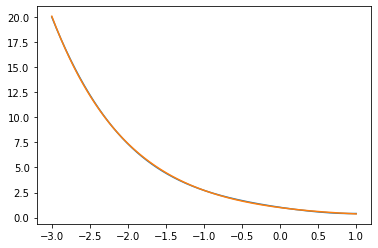

In [63]:
def f_approximate(x, c: list):
    n = len(c)
    return sum(coefs[-(i+1)] * x ** i for i in range(n))

y_data = [f_approximate(x, coefs) for x in x_data]

plt.plot(x_data, y_data)
plt.plot(x_data, np.exp(-x_data))
